In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNetCV


from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score

from sklearn.ensemble import RandomForestRegressor


import warnings
warnings.filterwarnings("ignore")

from scipy.stats import zscore
from scipy import stats
from sklearn.preprocessing import StandardScaler

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
df1 = pd.read_csv("cars_hyd.csv",index_col='index')

In [5]:
df1.head()

,year,kms,owners,vehicle,manual,location,amount,brand,mileage,engine,maxPower,maxPowerRPM,seats,Color,GearBox,driveType,SteeringType,FrontBrkType,RearBrkType,TopSpeed,acceleration,Doors,no_cyclinders,no_valves,valveConfig,fuelSupply
index,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2007,"71,000 kms",First Owner,Petrol,Manual,Hyderabad,"80,000*",Maruti,16.1 kmpl,796 CC,37bhp,5000rpm,4.0,Silver,4 Speed,FWD,NaN,Disc,Drum,144km/hr,21 Seconds,4.0,3.0,2.0,SOHC,MPFI
2,2009,"69,000 kms",Second Owner,Diesel,Manual,Hyderabad,"98,000*",Ford,13.8 kmpl,1399 CC,68bhp,4000rpm,5.0,NaN,5 Speed,FWD,NaN,NaN,NaN,NaN,NaN,4.0,4.0,2.0,DOHC,SEFI
3,2008,"86,000 kms",First Owner,Petrol,Manual,Hyderabad,"99,000*",Maruti,16.1 kmpl,796 CC,37bhp,5000rpm,4.0,Silver,4 Speed,FWD,NaN,NaN,NaN,NaN,21 Seconds,4.0,3.0,2.0,SOHC,MPFI
4,2007,"1,20,000 kms",First Owner,Diesel,Manual,Hyderabad,1 Lakh*,Tata,17.2 kmpl,1396 CC,53.5,"5,500 (PS",5.0,NaN,5 Speed,FWD,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,SOHC,MPFI
5,2004,"43,664 kms",First Owner,Petrol,Manual,Hyderabad,1 Lakh*,Ford,13.8 kmpl,1299 CC,70,"5,500 (PS",5.0,Red,5 Speed,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,2.0,SOHC,SEFI


In [6]:
df1.shape

(754, 26)

In [7]:
df2 = pd.read_csv("cars_Mumbai.csv",index_col='index')

In [8]:
df2.head()

,year,kms,owners,vehicle,manual,location,amount,brand,mileage,engine,maxPower,maxPowerRPM,seats,Color,GearBox,driveType,SteeringType,FrontBrkType,RearBrkType,TopSpeed,acceleration,Doors,no_cyclinders,no_valves,valveConfig,fuelSupply
index,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2007,"50,000 kms",Second Owner,Petrol,Manual,Mumbai,"55,000*",Maruti,16.1 kmpl,796 CC,37bhp,5000rpm,4.0,White,4 Speed,FWD,NaN,NaN,NaN,144km/hr,21 Seconds,4.0,3.0,2.0,SOHC,MPFI
2,2004,"1,00,000 kms",Third Owner,Petrol,Manual,Mumbai,"60,000*",Maruti,17.3 kmpl,993 CC,60 PS,6000 rpm,5.0,Silver,5 Speed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,SOHC,MPFI
3,2005,"75,855 kms",Third Owner,Petrol,Manual,Mumbai,"65,000*",Maruti,16.1 kmpl,796 CC,37bhp,5000rpm,4.0,Gold,4 Speed,FWD,NaN,NaN,NaN,144km/hr,21 Seconds,4.0,3.0,2.0,SOHC,MPFI
4,2006,"41,000 kms",Second Owner,Petrol,Manual,Mumbai,"69,000*",Maruti,15.9 kmpl,1298 CC,null bhp,NaN,5.0,Silver,NaN,NaN,Power,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2004,"80,746 kms",First Owner,Diesel,Manual,Mumbai,"69,000*",Tata,13.5 kmpl,1405 CC,null bhp,NaN,5.0,Silver,NaN,NaN,Power,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df2.shape

(2468, 26)

In [10]:
df3 = pd.read_csv("cars_Bangalore.csv",index_col='index')

In [11]:
df3.head()

,year,kms,owners,vehicle,manual,location,amount,brand,mileage,engine,maxPower,maxPowerRPM,seats,Color,GearBox,driveType,SteeringType,FrontBrkType,RearBrkType,TopSpeed,acceleration,Doors,no_cyclinders,no_valves,valveConfig,fuelSupply
index,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2000,"1,10,000 kms",Fourth & Above Owner,Petrol,Automatic,Bangalore,"48,000*",Hyundai,0.0 kmpl,999 CC,NaN,NaN,5.0,NaN,NaN,NaN,Power,NaN,NaN,NaN,NaN,5.0,4.0,4.0,NaN,NaN
2,2007,"90,000 kms",Third Owner,Petrol,Manual,Bangalore,"60,000*",Maruti,16.1 kmpl,796 CC,37bhp,5000rpm,4.0,NaN,4 Speed,FWD,Manual,Disc,Drum,144km/hr,21 Seconds,4.0,3.0,2.0,SOHC,MPFI
3,2002,"1,15,000 kms",Second Owner,Petrol,Manual,Bangalore,"85,000*",Maruti,16.1 kmpl,796 CC,37bhp,5000rpm,4.0,Blue,4 Speed,FWD,Manual,Disc,Drum,144km/hr,21 seconds,4.0,3.0,2.0,SOHC,MPFI
4,2000,"25,000 kms",First Owner,Petrol,Manual,Bangalore,"90,000*",Mitsubishi,13.7 kmpl,1468 CC,85.8bhp,5500rpm,5.0,NaN,5 Speed,FWD,Power,Ventilated Disc,Drum,175km/hr,12.95 seconds,4.0,4.0,3.0,SOHC,MPFI
5,2004,"20,000 kms",Second Owner,Petrol,Manual,Bangalore,1.05 Lakh*,Ford,14.2 kmpl,1597 CC,92,5500(PS,5.0,NaN,5 Speed,FWD,NaN,Ventilated Disc,Drum,157 kmph,14.5 seconds,4.0,4.0,2.0,SOHC,SEFI


In [12]:
df3.shape

(1344, 26)

In [13]:
df=pd.concat([df1,df2,df3],axis=0)

In [14]:
df.shape

(4566, 26)

In [15]:
df.index=(range(1,df.shape[0]+1))

In [16]:
df.head()

,year,kms,owners,vehicle,manual,location,amount,brand,mileage,engine,maxPower,maxPowerRPM,seats,Color,GearBox,driveType,SteeringType,FrontBrkType,RearBrkType,TopSpeed,acceleration,Doors,no_cyclinders,no_valves,valveConfig,fuelSupply
1,2007,"71,000 kms",First Owner,Petrol,Manual,Hyderabad,"80,000*",Maruti,16.1 kmpl,796 CC,37bhp,5000rpm,4.0,Silver,4 Speed,FWD,NaN,Disc,Drum,144km/hr,21 Seconds,4.0,3.0,2.0,SOHC,MPFI
2,2009,"69,000 kms",Second Owner,Diesel,Manual,Hyderabad,"98,000*",Ford,13.8 kmpl,1399 CC,68bhp,4000rpm,5.0,NaN,5 Speed,FWD,NaN,NaN,NaN,NaN,NaN,4.0,4.0,2.0,DOHC,SEFI
3,2008,"86,000 kms",First Owner,Petrol,Manual,Hyderabad,"99,000*",Maruti,16.1 kmpl,796 CC,37bhp,5000rpm,4.0,Silver,4 Speed,FWD,NaN,NaN,NaN,NaN,21 Seconds,4.0,3.0,2.0,SOHC,MPFI
4,2007,"1,20,000 kms",First Owner,Diesel,Manual,Hyderabad,1 Lakh*,Tata,17.2 kmpl,1396 CC,53.5,"5,500 (PS",5.0,NaN,5 Speed,FWD,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,SOHC,MPFI
5,2004,"43,664 kms",First Owner,Petrol,Manual,Hyderabad,1 Lakh*,Ford,13.8 kmpl,1299 CC,70,"5,500 (PS",5.0,Red,5 Speed,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,2.0,SOHC,SEFI


In [17]:
df.columns

Index(['year', 'kms', 'owners', 'vehicle', 'manual', 'location', 'amount',
       'brand', 'mileage', 'engine', 'maxPower', 'maxPowerRPM', 'seats',
       'Color', 'GearBox', 'driveType', 'SteeringType', 'FrontBrkType',
       'RearBrkType', 'TopSpeed', 'acceleration', 'Doors', 'no_cyclinders',
       'no_valves', 'valveConfig', 'fuelSupply'],
      dtype='object')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4566 entries, 1 to 4566
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           4566 non-null   int64  
 1   kms            4566 non-null   object 
 2   owners         4566 non-null   object 
 3   vehicle        4566 non-null   object 
 4   manual         4566 non-null   object 
 5   location       4566 non-null   object 
 6   amount         4566 non-null   object 
 7   brand          4566 non-null   object 
 8   mileage        4545 non-null   object 
 9   engine         4536 non-null   object 
 10  maxPower       4509 non-null   object 
 11  maxPowerRPM    3176 non-null   object 
 12  seats          4542 non-null   float64
 13  Color          4401 non-null   object 
 14  GearBox        4486 non-null   object 
 15  driveType      2834 non-null   object 
 16  SteeringType   916 non-null    object 
 17  FrontBrkType   1462 non-null   object 
 18  RearBrkT

there are missing values in 'mileage', 'engine', 'maxPower', 'maxPowerRPM', 'seats',
       'Color', 'GearBox', 'driveType', 'SteeringType', 'FrontBrkType',
       'RearBrkType', 'TopSpeed', 'acceleration', 'Doors', 'no_cyclinders',
       'no_valves', 'valveConfig', 'fuelSupply'

## amount

In [19]:
df['amount'].value_counts()

2.95 Lakh*     74
5.5 Lakh*      64
4.25 Lakh*     63
5.75 Lakh*     62
5.25 Lakh*     60
               ..
23.85 Lakh*     1
9.44 Lakh*      1
11.35 Lakh*     1
4.79 Lakh*      1
10.51 Lakh*     1
Name: amount, Length: 803, dtype: int64

In [20]:
def removeStar(x):
    return re.sub("[*, ]","",x)

In [21]:
import re

In [22]:
x="80,00 *"
re.sub("[*, ]","",x)

'8000'

In [23]:
y="8000"
re.sub("[*, ]","",x)

'8000'

In [24]:
df['amount']=df['amount'].apply(removeStar)

In [25]:
df['amount']

1        80000
2        98000
3        99000
4        1Lakh
5        1Lakh
         ...  
4562    99Lakh
4563     1.2Cr
4564     1.3Cr
4565     2.5Cr
4566    3.08Cr
Name: amount, Length: 4566, dtype: object

In [26]:
x="1Lakh"
x.split("Lakh")

['1', '']

In [27]:
x="1CR"
x.split("Lakh")

['1CR']

In [28]:
x="1"
x.split("Lakh")

['1']

In [29]:
def returnLakhs(x):
    if "lakh" in x.lower():
        return int(float(x.lower().split("lakh")[0])*100000)
    elif "cr" in x.lower():
        return int(float(x.lower().split("cr")[0])*10000000)
    else:
        return int(float(x))

In [30]:
df['amount']=df['amount'].apply(returnLakhs)

## year

In [31]:
df['year'].value_counts()

2017    515
2016    502
2018    480
2015    438
2014    419
2013    390
2012    352
2011    336
2019    258
2010    243
2009    147
2020    145
2008    141
2007     79
2021     41
2006     35
2005     19
2004     14
2002      4
2000      4
2001      2
1999      1
2003      1
Name: year, dtype: int64

In [32]:
pd.set_option('display.max_columns',None)

## kms

In [33]:
df['kms'].head(5)

1      71,000 kms
2      69,000 kms
3      86,000 kms
4    1,20,000 kms
5      43,664 kms
Name: kms, dtype: object

In [34]:
y=df['kms'].apply(lambda x: True if(x[-3:]=='kms') else False)

In [35]:
df[y==False]

,year,kms,owners,vehicle,manual,location,amount,brand,mileage,engine,maxPower,maxPowerRPM,seats,Color,GearBox,driveType,SteeringType,FrontBrkType,RearBrkType,TopSpeed,acceleration,Doors,no_cyclinders,no_valves,valveConfig,fuelSupply


In [36]:
df['kms']=df['kms'].apply(lambda x: x[:-4] if(x[-3:]=='kms') else x)

In [37]:
df['kms']=df['kms'].apply(lambda x : int(re.sub("[,]","",x)))

In [38]:
df['kms'].head()

1     71000
2     69000
3     86000
4    120000
5     43664
Name: kms, dtype: int64

<AxesSubplot:xlabel='kms', ylabel='amount'>

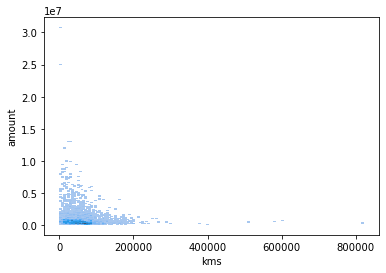

In [39]:
sns.histplot(y='amount',x='kms',data=df)

<AxesSubplot:xlabel='kms', ylabel='amount'>

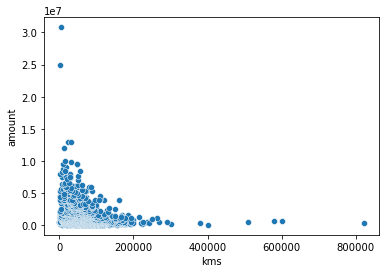

In [40]:
sns.scatterplot(y='amount',x='kms',data=df)

## owners

In [41]:
df['owners'].value_counts()

First Owner             3430
Second Owner             966
Third Owner              139
Test Drive Car            17
Fourth & Above Owner      14
Name: owners, dtype: int64

### dropping the rows with test drive car

In [42]:
df[df['owners']=='Test Drive Car']

,year,kms,owners,vehicle,manual,location,amount,brand,mileage,engine,maxPower,maxPowerRPM,seats,Color,GearBox,driveType,SteeringType,FrontBrkType,RearBrkType,TopSpeed,acceleration,Doors,no_cyclinders,no_valves,valveConfig,fuelSupply
39,2011,60101,Test Drive Car,Petrol,Manual,Hyderabad,225000,Maruti,19.0 kmpl,998 CC,66.1bhp,6200rpm,5.0,White,5 Speed,FWD,Power,Ventilated Disc,Drum,NaN,NaN,5.0,3.0,4.0,NaN,MPFI
43,2010,43000,Test Drive Car,Petrol,Manual,Hyderabad,229999,Maruti,20.92 kmpl,998 CC,67.1bhp,6200rpm,5.0,Maroon,5 Speed,FWD,NaN,NaN,Drum,NaN,13.3 Seconds,5.0,3.0,4.0,NaN,NaN
153,2011,51000,Test Drive Car,Petrol,Manual,Hyderabad,325000,Hyundai,17.0 kmpl,1197 CC,80 bhp,NaN,5.0,Silver,5 Speed,FWD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159,2011,51000,Test Drive Car,Petrol,Manual,Hyderabad,330000,Hyundai,17.0 kmpl,1197 CC,80 PS at 5200 rpm,NaN,5.0,Silver,5 Speed,FWD,NaN,NaN,NaN,NaN,NaN,5.0,4.0,4.0,DOHC,MPFI
250,2014,116000,Test Drive Car,Diesel,Manual,Hyderabad,420000,Honda,25.8 kmpl,1498 CC,98.6bhp,3600rpm,5.0,Silver,5 Speed,NaN,NaN,NaN,Drum,170 Kmph,17 Seconds,4.0,4.0,4.0,DOHC,NaN
303,2013,115000,Test Drive Car,Diesel,Manual,Hyderabad,465000,Renault,19.01 kmpl,1461 CC,108.45bhp,3900rpm,5.0,Silver,6 Speed,FWD,NaN,NaN,NaN,NaN,NaN,5.0,4.0,4.0,DOHC,CRDI
476,2014,84000,Test Drive Car,Diesel,Manual,Hyderabad,660000,Maruti,20.77 kmpl,1248 CC,88.76bhp,4000rpm,7.0,Blue,5 Speed,NaN,NaN,NaN,NaN,NaN,13.3 Seconds,5.0,4.0,4.0,DOHC,CRDI
2767,2013,41000,Test Drive Car,Diesel,Automatic,Mumbai,1280000,BMW,17.05 kmpl,1995 CC,184bhp,4000rpm,5.0,Blue,8-Speed,RWD,NaN,NaN,NaN,NaN,NaN,5.0,4.0,4.0,NaN,CRDi
2968,2021,3000,Test Drive Car,Petrol,Automatic,Mumbai,1900000,Mahindra,0.0 kmpl,1997 CC,150bhp,5000rpm,4.0,Red,6 Speed,4X4,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,DOHC,Direct Engine
2977,2021,1000,Test Drive Car,Petrol,Automatic,Mumbai,1950000,Mahindra,0.0 kmpl,1997 CC,150 bhp,NaN,4.0,Black,6 Speed,4X4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
indexVals=df[df['owners']=='Test Drive Car'].index
indexVals

Int64Index([  39,   43,  153,  159,  250,  303,  476, 2767, 2968, 2977, 2994,
            3185, 3212, 4535, 4551, 4565, 4566],
           dtype='int64')

In [44]:
df.drop(index=indexVals,inplace=True)

In [45]:
df['owners'].value_counts()

First Owner             3430
Second Owner             966
Third Owner              139
Fourth & Above Owner      14
Name: owners, dtype: int64

<AxesSubplot:xlabel='owners', ylabel='amount'>

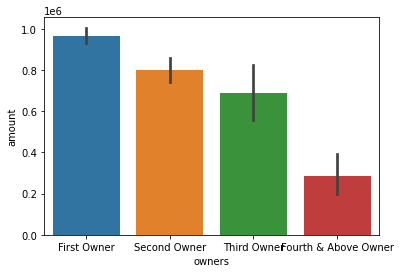

In [46]:
sns.barplot(x='owners',y='amount',data=df)

In [47]:
def returnOwners(x):
    if "First" in x:
        return 1
    elif "Second" in x:
        return 2
    elif "Third" in x:
        return 3
    else:
        return 4

In [48]:
df['owners']=df['owners'].apply(returnOwners)

In [49]:
df['owners'].value_counts()

1    3430
2     966
3     139
4      14
Name: owners, dtype: int64

## Vehicle

In [50]:
df['vehicle'].value_counts()

Petrol      2312
Diesel      2174
CNG           45
LPG           12
Electric       6
Name: vehicle, dtype: int64

<AxesSubplot:xlabel='vehicle', ylabel='amount'>

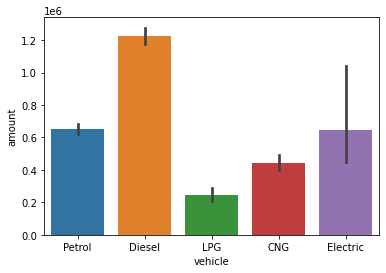

In [51]:
sns.barplot(x='vehicle',y='amount',data=df)

## manual

In [52]:
df['manual'].value_counts()

Manual       3036
Automatic    1513
Name: manual, dtype: int64

<AxesSubplot:xlabel='manual', ylabel='amount'>

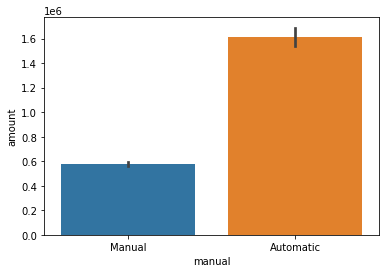

In [53]:
sns.barplot(x='manual',y='amount',data=df)

## location

In [54]:
df['location'].value_counts()

Mumbai       2462
Bangalore    1340
Hyderabad     747
Name: location, dtype: int64

<AxesSubplot:xlabel='location', ylabel='amount'>

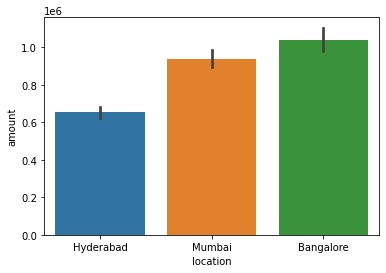

In [55]:
sns.barplot(x='location',y='amount',data=df)

## brand

In [56]:
df['brand'].nunique()

35

In [55]:
df['brand'].value_counts()

Maruti           1068
Hyundai           826
Honda             434
Toyota            359
Mahindra          261
Volkswagen        202
Ford              198
Mercedes-Benz     198
Skoda             150
Tata              136
BMW               135
Renault           130
Audi              115
Chevrolet          49
Nissan             49
Jeep               26
Datsun             26
Kia                26
Land               25
Jaguar             24
Volvo              24
MG                 16
Porsche            14
Mini               14
Fiat               14
Mitsubishi         14
New                 3
Lexus               2
Maserati            2
Isuzu               2
Premier             2
Bentley             2
Aston               1
ICML                1
OpelCorsa           1
Name: brand, dtype: int64

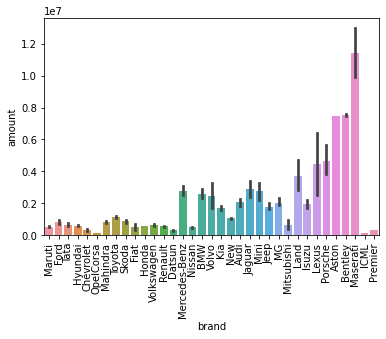

In [56]:
sns.barplot(x='brand',y='amount',data=df)
plt.xticks(rotation=90);

## mileage

In [57]:
x="161.5 kmpl"
x.strip("kmpl").strip()

'161.5'

In [58]:
y="161.5 "
y.strip("kmpl").strip()

'161.5'

In [59]:
df['mileage'].type=str

In [60]:
df[df['mileage'].isnull()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 25 to 3858
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           21 non-null     int64  
 1   kms            21 non-null     int64  
 2   owners         21 non-null     int64  
 3   vehicle        21 non-null     object 
 4   manual         21 non-null     object 
 5   location       21 non-null     object 
 6   amount         21 non-null     int64  
 7   brand          21 non-null     object 
 8   mileage        0 non-null      object 
 9   engine         0 non-null      object 
 10  maxPower       0 non-null      object 
 11  maxPowerRPM    0 non-null      object 
 12  seats          0 non-null      float64
 13  Color          0 non-null      object 
 14  GearBox        0 non-null      object 
 15  driveType      0 non-null      object 
 16  SteeringType   0 non-null      object 
 17  FrontBrkType   0 non-null      object 
 18  RearBrkTy

In [61]:
df2=df.copy()

In [62]:
df['mileage'].isnull().sum()

21

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4549 entries, 1 to 4564
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           4549 non-null   int64  
 1   kms            4549 non-null   int64  
 2   owners         4549 non-null   int64  
 3   vehicle        4549 non-null   object 
 4   manual         4549 non-null   object 
 5   location       4549 non-null   object 
 6   amount         4549 non-null   int64  
 7   brand          4549 non-null   object 
 8   mileage        4528 non-null   object 
 9   engine         4519 non-null   object 
 10  maxPower       4492 non-null   object 
 11  maxPowerRPM    3164 non-null   object 
 12  seats          4525 non-null   float64
 13  Color          4384 non-null   object 
 14  GearBox        4471 non-null   object 
 15  driveType      2820 non-null   object 
 16  SteeringType   915 non-null    object 
 17  FrontBrkType   1460 non-null   object 
 18  RearBrkT

In [64]:
x="124"
if ~(x is None):
    print(x)

124


In [65]:
type(x)

str

In [66]:
df['mileage'].head()

1    16.1 kmpl
2    13.8 kmpl
3    16.1 kmpl
4    17.2 kmpl
5    13.8 kmpl
Name: mileage, dtype: object

In [67]:
df['mileage'].tail()

4560     42.0 kmpl
4561     8.13 kmpl
4562     12.0 kmpl
4563      0.0 kmpl
4564    13.33 kmpl
Name: mileage, dtype: object

In [68]:
x="16.1 kmpl"
x.strip("kmpl")

'16.1 '

df['mileage'].apply(lambda x: (x.strip("kmpl").strip()) if (type(x) is str) else x)

In [69]:
(df['mileage'].apply(lambda x: (x[-5:]) if (type(x) is str) else x)).value_counts()

 kmpl    4465
km/kg      57
km/hr       6
Name: mileage, dtype: int64

In [70]:
x

'16.1 kmpl'

In [71]:
re.sub("[kmpl,km/kg,km/hr]","",x)

'16.1 '

x=123
re.sub("[kmpl,km/kg,km/hr]","",x)
---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
<ipython-input-365-9f5823e7921f> in <module>
      1 x=123
----> 2 re.sub("[kmpl,km/kg,km/hr]","",x)

~\AppData\Local\Continuum\anaconda3\lib\re.py in sub(pattern, repl, string, count, flags)
    190     a callable, it's passed the Match object and must return
    191     a replacement string to be used."""
--> 192     return _compile(pattern, flags).sub(repl, string, count)
    193 
    194 def subn(pattern, repl, string, count=0, flags=0):

TypeError: expected string or bytes-like object

In [72]:
(df['mileage'].apply(lambda x: float(re.sub("[kmpl,km/kg,km/hr]","",x).strip())
                                          if (type(x) is str) else x))

1       16.10
2       13.80
3       16.10
4       17.20
5       13.80
        ...  
4560    42.00
4561     8.13
4562    12.00
4563     0.00
4564    13.33
Name: mileage, Length: 4549, dtype: float64

In [73]:
df['mileage']=(df['mileage'].apply(lambda x: float(re.sub("[kmpl,km/kg,km/hr]","",x).strip())
                                          if (type(x) is str) else x))

In [74]:
sorted(df['mileage'].unique(),reverse=True)

[42.0,
 33.54,
 33.44,
 32.52,
 32.26,
 31.79,
 28.4,
 28.09,
 27.62,
 27.4,
 27.39,
 27.3,
 27.28,
 27.03,
 26.83,
 nan,
 26.8,
 26.68,
 26.6,
 26.59,
 26.55,
 26.3,
 26.21,
 26.2,
 26.1,
 26.08,
 26.0,
 25.83,
 25.8,
 25.6,
 25.5,
 25.47,
 25.44,
 25.4,
 25.32,
 25.24,
 25.2,
 25.17,
 25.1,
 25.0,
 24.7,
 24.52,
 24.4,
 24.3,
 24.2,
 24.1,
 24.04,
 24.0,
 23.95,
 23.9,
 23.87,
 23.84,
 23.8,
 23.7,
 23.65,
 23.59,
 23.5,
 23.4,
 23.3,
 23.26,
 23.2,
 23.1,
 23.08,
 23.03,
 23.01,
 23.0,
 22.95,
 22.9,
 22.8,
 22.77,
 22.74,
 22.71,
 22.7,
 22.69,
 22.54,
 22.5,
 22.32,
 22.3,
 22.27,
 22.15,
 22.1,
 22.07,
 22.05,
 22.0,
 21.94,
 21.9,
 21.79,
 21.76,
 21.74,
 21.72,
 21.7,
 21.66,
 21.64,
 21.63,
 21.56,
 21.5,
 21.43,
 21.4,
 21.38,
 21.27,
 21.21,
 21.19,
 21.14,
 21.13,
 21.12,
 21.1,
 21.04,
 21.03,
 21.01,
 21.0,
 20.92,
 20.89,
 20.88,
 20.85,
 20.8,
 20.77,
 20.73,
 20.71,
 20.7,
 20.68,
 20.65,
 20.64,
 20.63,
 20.6,
 20.54,
 20.52,
 20.51,
 20.5,
 20.46,
 20.45,
 20.4,
 20.

In [75]:
df[df['mileage'].isnull()]

,year,kms,owners,vehicle,manual,location,amount,brand,mileage,engine,maxPower,maxPowerRPM,seats,Color,GearBox,driveType,SteeringType,FrontBrkType,RearBrkType,TopSpeed,acceleration,Doors,no_cyclinders,no_valves,valveConfig,fuelSupply
25,2007,83132,1,Petrol,Manual,Hyderabad,190000,Hyundai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,2008,86000,1,Petrol,Manual,Hyderabad,275000,Maruti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118,2007,80476,1,Petrol,Manual,Hyderabad,290000,Maruti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
245,2011,78310,1,Petrol,Manual,Hyderabad,413999,Maruti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
761,1999,110000,2,Petrol,Manual,Mumbai,75000,Hyundai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
763,2003,80000,1,Petrol,Manual,Mumbai,79000,Hyundai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
778,2006,120000,3,Petrol,Manual,Mumbai,114999,Maruti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
830,2007,83000,1,Petrol,Manual,Mumbai,160000,Maruti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
842,2007,71000,1,Petrol,Manual,Mumbai,170000,Maruti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
843,2007,29423,1,Petrol,Manual,Mumbai,170000,Maruti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
df[df['mileage']==0]

,year,kms,owners,vehicle,manual,location,amount,brand,mileage,engine,maxPower,maxPowerRPM,seats,Color,GearBox,driveType,SteeringType,FrontBrkType,RearBrkType,TopSpeed,acceleration,Doors,no_cyclinders,no_valves,valveConfig,fuelSupply
11,2007,73000,2,Petrol,Manual,Hyderabad,140000,Hyundai,0.0,1086 CC,null bhp,NaN,5.0,Silver,NaN,NaN,Power,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,2006,75040,1,Petrol,Manual,Hyderabad,180000,Hyundai,0.0,999 CC,NaN,NaN,5.0,Red,NaN,NaN,Power,NaN,NaN,NaN,NaN,NaN,4.0,4.0,NaN,NaN
32,2008,45617,1,Petrol,Manual,Hyderabad,210000,Hyundai,0.0,1086 CC,62bhp,5500rpm,5.0,Silver,5 Speed,NaN,Power,Ventilated Disc,Drum,141km/hr,16.2 seconds,5.0,4.0,3.0,SOHC,MPFI
70,2007,76000,1,Petrol,Automatic,Hyderabad,250000,Hyundai,0.0,999 CC,NaN,NaN,5.0,Silver,NaN,NaN,Power,NaN,NaN,NaN,NaN,5.0,4.0,4.0,NaN,NaN
88,2007,76000,1,Petrol,Automatic,Hyderabad,250000,Hyundai,0.0,999 CC,null bhp,NaN,5.0,Silver,NaN,NaN,Power,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158,2002,135000,1,Petrol,Manual,Hyderabad,330000,Mercedes-Benz,0.0,NaN,NaN,NaN,5.0,Blue,NaN,NaN,Power,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN
284,2018,48008,1,Electric,Automatic,Hyderabad,450000,Mahindra,0.0,0 CC,41.57bhp,3500rpm,5.0,White,Fully Automatic,NaN,NaN,NaN,NaN,NaN,NaN,4.0,0.0,0.0,undefined,Electric
288,2018,45005,1,Electric,Automatic,Hyderabad,450000,Mahindra,0.0,0 CC,41.57bhp,3500rpm,5.0,White,Fully Automatic,NaN,NaN,NaN,NaN,NaN,NaN,4.0,0.0,0.0,undefined,Electric
290,2018,46505,1,Electric,Automatic,Hyderabad,450000,Mahindra,0.0,0 CC,41.57 bhp,NaN,5.0,White,Fully Automatic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
292,2018,47007,1,Electric,Automatic,Hyderabad,450000,Mahindra,0.0,0 CC,41.57bhp,3500rpm,5.0,White,Fully Automatic,NaN,NaN,NaN,NaN,NaN,NaN,4.0,0.0,0.0,undefined,Electric


In [77]:
df1=df.copy()

In [78]:
df[df['mileage'].isnull()]

,year,kms,owners,vehicle,manual,location,amount,brand,mileage,engine,maxPower,maxPowerRPM,seats,Color,GearBox,driveType,SteeringType,FrontBrkType,RearBrkType,TopSpeed,acceleration,Doors,no_cyclinders,no_valves,valveConfig,fuelSupply
25,2007,83132,1,Petrol,Manual,Hyderabad,190000,Hyundai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,2008,86000,1,Petrol,Manual,Hyderabad,275000,Maruti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118,2007,80476,1,Petrol,Manual,Hyderabad,290000,Maruti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
245,2011,78310,1,Petrol,Manual,Hyderabad,413999,Maruti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
761,1999,110000,2,Petrol,Manual,Mumbai,75000,Hyundai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
763,2003,80000,1,Petrol,Manual,Mumbai,79000,Hyundai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
778,2006,120000,3,Petrol,Manual,Mumbai,114999,Maruti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
830,2007,83000,1,Petrol,Manual,Mumbai,160000,Maruti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
842,2007,71000,1,Petrol,Manual,Mumbai,170000,Maruti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
843,2007,29423,1,Petrol,Manual,Mumbai,170000,Maruti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


most of the features have null values where mileage is null so dropping all these rows

In [79]:
df[df['mileage'].isnull()].index

Int64Index([  25,  106,  118,  245,  761,  763,  778,  830,  842,  843,  956,
            1058, 1162, 1169, 2757, 2837, 3061, 3258, 3262, 3272, 3858],
           dtype='int64')

In [80]:
df.drop(df[df['mileage'].isnull()].index,inplace=True)

In [81]:
df.groupby('brand').mean()['mileage']

brand
Aston             9.600000
Audi             15.659391
BMW              16.884962
Bentley           9.350000
Chevrolet        18.709592
Datsun           21.009231
Fiat             15.466667
Ford             18.300558
Honda            18.133963
Hyundai          18.476853
ICML             11.120000
Isuzu            13.800000
Jaguar           14.172917
Jeep             16.576923
Kia              18.008077
Land             11.442000
Lexus            18.320000
MG               14.127188
Mahindra         14.828927
Maruti           21.941477
Maserati         12.000000
Mercedes-Benz    13.942525
Mini             17.965714
Mitsubishi       13.433571
New              17.150000
Nissan           19.838367
OpelCorsa        13.800000
Porsche          14.155000
Premier          16.000000
Renault          20.433385
Skoda            17.433600
Tata             19.817353
Toyota           13.787577
Volkswagen       18.083960
Volvo            17.608333
Name: mileage, dtype: float64

In [82]:
df[df['mileage']==0]

,year,kms,owners,vehicle,manual,location,amount,brand,mileage,engine,maxPower,maxPowerRPM,seats,Color,GearBox,driveType,SteeringType,FrontBrkType,RearBrkType,TopSpeed,acceleration,Doors,no_cyclinders,no_valves,valveConfig,fuelSupply
11,2007,73000,2,Petrol,Manual,Hyderabad,140000,Hyundai,0.0,1086 CC,null bhp,NaN,5.0,Silver,NaN,NaN,Power,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,2006,75040,1,Petrol,Manual,Hyderabad,180000,Hyundai,0.0,999 CC,NaN,NaN,5.0,Red,NaN,NaN,Power,NaN,NaN,NaN,NaN,NaN,4.0,4.0,NaN,NaN
32,2008,45617,1,Petrol,Manual,Hyderabad,210000,Hyundai,0.0,1086 CC,62bhp,5500rpm,5.0,Silver,5 Speed,NaN,Power,Ventilated Disc,Drum,141km/hr,16.2 seconds,5.0,4.0,3.0,SOHC,MPFI
70,2007,76000,1,Petrol,Automatic,Hyderabad,250000,Hyundai,0.0,999 CC,NaN,NaN,5.0,Silver,NaN,NaN,Power,NaN,NaN,NaN,NaN,5.0,4.0,4.0,NaN,NaN
88,2007,76000,1,Petrol,Automatic,Hyderabad,250000,Hyundai,0.0,999 CC,null bhp,NaN,5.0,Silver,NaN,NaN,Power,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158,2002,135000,1,Petrol,Manual,Hyderabad,330000,Mercedes-Benz,0.0,NaN,NaN,NaN,5.0,Blue,NaN,NaN,Power,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN
284,2018,48008,1,Electric,Automatic,Hyderabad,450000,Mahindra,0.0,0 CC,41.57bhp,3500rpm,5.0,White,Fully Automatic,NaN,NaN,NaN,NaN,NaN,NaN,4.0,0.0,0.0,undefined,Electric
288,2018,45005,1,Electric,Automatic,Hyderabad,450000,Mahindra,0.0,0 CC,41.57bhp,3500rpm,5.0,White,Fully Automatic,NaN,NaN,NaN,NaN,NaN,NaN,4.0,0.0,0.0,undefined,Electric
290,2018,46505,1,Electric,Automatic,Hyderabad,450000,Mahindra,0.0,0 CC,41.57 bhp,NaN,5.0,White,Fully Automatic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
292,2018,47007,1,Electric,Automatic,Hyderabad,450000,Mahindra,0.0,0 CC,41.57bhp,3500rpm,5.0,White,Fully Automatic,NaN,NaN,NaN,NaN,NaN,NaN,4.0,0.0,0.0,undefined,Electric


In [83]:
df2=df.copy()

In [84]:
df['mileage']=df['mileage'].replace(0,np.nan)

In [85]:
df.groupby('brand').mean()['mileage']

brand
Aston             9.600000
Audi             15.659391
BMW              16.884962
Bentley           9.350000
Chevrolet        18.709592
Datsun           21.009231
Fiat             18.560000
Ford             18.300558
Honda            18.133963
Hyundai          18.796601
ICML             11.120000
Isuzu            13.800000
Jaguar           14.172917
Jeep             16.576923
Kia              18.008077
Land             13.621429
Lexus            18.320000
MG               14.127188
Mahindra         15.543574
Maruti           21.962275
Maserati         12.000000
Mercedes-Benz    14.606455
Mini             17.965714
Mitsubishi       13.433571
New              17.150000
Nissan           19.838367
OpelCorsa        13.800000
Porsche          14.155000
Premier          16.000000
Renault          20.433385
Skoda            17.433600
Tata             19.964148
Toyota           13.864818
Volkswagen       18.173930
Volvo            17.608333
Name: mileage, dtype: float64

In [86]:
df[df['mileage'].isnull()].index

Int64Index([  11,   23,   32,   70,   88,  158,  284,  288,  290,  292,  293,
             733,  738,  775,  793,  797,  867,  877, 2324, 2508, 2518, 2728,
            2749, 2765, 2887, 2941, 2946, 2952, 2959, 3183, 3217, 3218, 3223,
            3229, 3242, 3243, 3271, 3282, 4144, 4218, 4303, 4323, 4396, 4439,
            4531, 4563],
           dtype='int64')

In [87]:
df['mileage']=df.groupby('brand')['mileage'].transform(lambda val: val.fillna(val.mean()))

In [88]:
df[df1['mileage']==0]

,year,kms,owners,vehicle,manual,location,amount,brand,mileage,engine,maxPower,maxPowerRPM,seats,Color,GearBox,driveType,SteeringType,FrontBrkType,RearBrkType,TopSpeed,acceleration,Doors,no_cyclinders,no_valves,valveConfig,fuelSupply
11,2007,73000,2,Petrol,Manual,Hyderabad,140000,Hyundai,18.796601,1086 CC,null bhp,NaN,5.0,Silver,NaN,NaN,Power,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,2006,75040,1,Petrol,Manual,Hyderabad,180000,Hyundai,18.796601,999 CC,NaN,NaN,5.0,Red,NaN,NaN,Power,NaN,NaN,NaN,NaN,NaN,4.0,4.0,NaN,NaN
32,2008,45617,1,Petrol,Manual,Hyderabad,210000,Hyundai,18.796601,1086 CC,62bhp,5500rpm,5.0,Silver,5 Speed,NaN,Power,Ventilated Disc,Drum,141km/hr,16.2 seconds,5.0,4.0,3.0,SOHC,MPFI
70,2007,76000,1,Petrol,Automatic,Hyderabad,250000,Hyundai,18.796601,999 CC,NaN,NaN,5.0,Silver,NaN,NaN,Power,NaN,NaN,NaN,NaN,5.0,4.0,4.0,NaN,NaN
88,2007,76000,1,Petrol,Automatic,Hyderabad,250000,Hyundai,18.796601,999 CC,null bhp,NaN,5.0,Silver,NaN,NaN,Power,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158,2002,135000,1,Petrol,Manual,Hyderabad,330000,Mercedes-Benz,14.606455,NaN,NaN,NaN,5.0,Blue,NaN,NaN,Power,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN
284,2018,48008,1,Electric,Automatic,Hyderabad,450000,Mahindra,15.543574,0 CC,41.57bhp,3500rpm,5.0,White,Fully Automatic,NaN,NaN,NaN,NaN,NaN,NaN,4.0,0.0,0.0,undefined,Electric
288,2018,45005,1,Electric,Automatic,Hyderabad,450000,Mahindra,15.543574,0 CC,41.57bhp,3500rpm,5.0,White,Fully Automatic,NaN,NaN,NaN,NaN,NaN,NaN,4.0,0.0,0.0,undefined,Electric
290,2018,46505,1,Electric,Automatic,Hyderabad,450000,Mahindra,15.543574,0 CC,41.57 bhp,NaN,5.0,White,Fully Automatic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
292,2018,47007,1,Electric,Automatic,Hyderabad,450000,Mahindra,15.543574,0 CC,41.57bhp,3500rpm,5.0,White,Fully Automatic,NaN,NaN,NaN,NaN,NaN,NaN,4.0,0.0,0.0,undefined,Electric


## engine CC

In [89]:
df['engine'].value_counts().head()

1197 CC    639
1248 CC    366
998 CC     258
1497 CC    220
1498 CC    212
Name: engine, dtype: int64

In [90]:
x="23 Cc"
str(x).lower()

'23 cc'

In [91]:
df['engine']=df['engine'].apply((lambda x: float(re.sub("[cc, ]","",str(x).lower()))
                    if (type(x) is str) else x))

In [92]:
df[df['engine'].isnull()]

,year,kms,owners,vehicle,manual,location,amount,brand,mileage,engine,maxPower,maxPowerRPM,seats,Color,GearBox,driveType,SteeringType,FrontBrkType,RearBrkType,TopSpeed,acceleration,Doors,no_cyclinders,no_valves,valveConfig,fuelSupply
158,2002,135000,1,Petrol,Manual,Hyderabad,330000,Mercedes-Benz,14.606455,NaN,NaN,NaN,5.0,Blue,NaN,NaN,Power,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN
224,2007,113000,1,Petrol,Automatic,Hyderabad,395000,Honda,14.000000,NaN,NaN,NaN,5.0,White,NaN,NaN,Power,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN
553,2009,82743,1,Diesel,Automatic,Hyderabad,780000,BMW,18.480000,NaN,NaN,NaN,5.0,Brown,6 Speed,NaN,Power,Ventilated discs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
740,2011,32000,1,Diesel,Automatic,Hyderabad,1900000,BMW,18.480000,NaN,NaN,NaN,5.0,White,6 Speed,NaN,Power,Ventilated discs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
823,2004,40000,2,Petrol,Automatic,Mumbai,150000,Honda,14.500000,NaN,NaN,NaN,5.0,Silver,NaN,NaN,Power,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN
2779,2012,71000,2,Diesel,Automatic,Mumbai,1325000,BMW,18.480000,NaN,NaN,NaN,5.0,White,6 Speed,NaN,Power,Ventilated discs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2788,2012,62000,1,Diesel,Automatic,Mumbai,1375000,BMW,18.480000,NaN,NaN,NaN,5.0,Silver,6 Speed,NaN,Power,Ventilated discs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2813,2012,56000,1,Diesel,Automatic,Mumbai,1425000,BMW,18.480000,NaN,NaN,NaN,5.0,White,6 Speed,NaN,Power,Ventilated discs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3862,2009,63524,1,Petrol,Automatic,Bangalore,650000,Honda,14.000000,NaN,NaN,NaN,5.0,White,NaN,NaN,Power,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN


Along with engine many other features have null values so dropping off all these rows

In [93]:
df.drop(index=df[df['engine'].isnull()].index,inplace=True)

In [94]:
df.shape

(4519, 26)

In [95]:
df[df['engine']==0].index

Int64Index([284, 288, 290, 292, 293], dtype='int64')

In [96]:
df.drop(df[df['engine']==0].index,inplace=True)

dropping the feartues having 0 value fogr engine cc as they has have other values also 0

<AxesSubplot:xlabel='engine', ylabel='amount'>

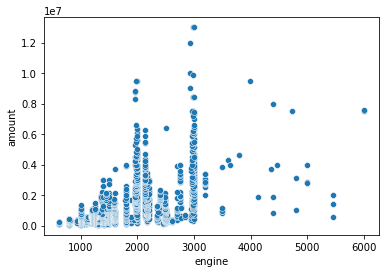

In [97]:
sns.scatterplot(x="engine",y="amount",data=df)

In [98]:
df.shape[0]

4514

In [99]:
sum(df['no_cyclinders'].isnull())

1172

In [100]:
for column in df.columns:
    print( column , "*"*5,(sum(df[column].isnull())/df.shape[0])*100)
    

year ***** 0.0
kms ***** 0.0
owners ***** 0.0
vehicle ***** 0.0
manual ***** 0.0
location ***** 0.0
amount ***** 0.0
brand ***** 0.0
mileage ***** 0.0
engine ***** 0.0
maxPower ***** 0.5981391227292867
maxPowerRPM ***** 29.995569339831636
seats ***** 0.0664599025254763
Color ***** 3.190075321222862
GearBox ***** 1.1741249446167479
driveType ***** 37.52769162605228
SteeringType ***** 79.92910943730615
FrontBrkType ***** 67.76694727514399
RearBrkType ***** 61.896322552060255
TopSpeed ***** 71.71023482498893
acceleration ***** 66.17190961453257
Doors ***** 35.821887461231725
no_cyclinders ***** 25.963668586619406
no_valves ***** 25.919361984935758
valveConfig ***** 36.68586619406292
fuelSupply ***** 31.76783340717767


In [101]:
df.columns

Index(['year', 'kms', 'owners', 'vehicle', 'manual', 'location', 'amount',
       'brand', 'mileage', 'engine', 'maxPower', 'maxPowerRPM', 'seats',
       'Color', 'GearBox', 'driveType', 'SteeringType', 'FrontBrkType',
       'RearBrkType', 'TopSpeed', 'acceleration', 'Doors', 'no_cyclinders',
       'no_valves', 'valveConfig', 'fuelSupply'],
      dtype='object')

In [102]:
df['driveType'].value_counts()

FWD                                  2052
RWD                                   272
AWD                                   165
4WD                                   106
2WD                                    65
2 WD                                   61
Front Wheel Drive                      31
4X2                                    21
Two Wheel Drive                        18
4X4                                    11
Permanent all-wheel drive quattro       7
All Wheel Drive                         5
Two Whhel Drive                         2
4 WD                                    2
2wd                                     1
Rear-wheel drive with ESP               1
Name: driveType, dtype: int64

In [103]:
df.head()

,year,kms,owners,vehicle,manual,location,amount,brand,mileage,engine,maxPower,maxPowerRPM,seats,Color,GearBox,driveType,SteeringType,FrontBrkType,RearBrkType,TopSpeed,acceleration,Doors,no_cyclinders,no_valves,valveConfig,fuelSupply
1,2007,71000,1,Petrol,Manual,Hyderabad,80000,Maruti,16.1,796.0,37bhp,5000rpm,4.0,Silver,4 Speed,FWD,NaN,Disc,Drum,144km/hr,21 Seconds,4.0,3.0,2.0,SOHC,MPFI
2,2009,69000,2,Diesel,Manual,Hyderabad,98000,Ford,13.8,1399.0,68bhp,4000rpm,5.0,NaN,5 Speed,FWD,NaN,NaN,NaN,NaN,NaN,4.0,4.0,2.0,DOHC,SEFI
3,2008,86000,1,Petrol,Manual,Hyderabad,99000,Maruti,16.1,796.0,37bhp,5000rpm,4.0,Silver,4 Speed,FWD,NaN,NaN,NaN,NaN,21 Seconds,4.0,3.0,2.0,SOHC,MPFI
4,2007,120000,1,Diesel,Manual,Hyderabad,100000,Tata,17.2,1396.0,53.5,"5,500 (PS",5.0,NaN,5 Speed,FWD,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,SOHC,MPFI
5,2004,43664,1,Petrol,Manual,Hyderabad,100000,Ford,13.8,1299.0,70,"5,500 (PS",5.0,Red,5 Speed,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,2.0,SOHC,SEFI


dropping the features having more than 20% missing data
 'maxPowerRPM', 'driveType', 'SteeringType', 'FrontBrkType',
    'RearBrkType', 'TopSpeed', 'acceleration', 'Doors', 'no_cyclinders',
    'no_valves', 'valveConfig', 'fuelSupply'


In [104]:
df4=df.copy()

In [105]:
df.drop(['maxPowerRPM', 'driveType', 'seats','SteeringType', 'FrontBrkType',
    'RearBrkType', 'TopSpeed', 'acceleration', 'Doors', 'no_cyclinders',
    'no_valves', 'valveConfig', 'fuelSupply','GearBox'],axis=1,inplace=True)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4514 entries, 1 to 4564
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      4514 non-null   int64  
 1   kms       4514 non-null   int64  
 2   owners    4514 non-null   int64  
 3   vehicle   4514 non-null   object 
 4   manual    4514 non-null   object 
 5   location  4514 non-null   object 
 6   amount    4514 non-null   int64  
 7   brand     4514 non-null   object 
 8   mileage   4514 non-null   float64
 9   engine    4514 non-null   float64
 10  maxPower  4487 non-null   object 
 11  Color     4370 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 458.5+ KB


## maxPower  

In [107]:
df['maxPower'].value_counts()

74bhp         105
88.5bhp        91
81.80bhp       88
140bhp         77
78.9bhp        76
             ... 
325.86 bhp      1
261.5bhp        1
241.38 bhp      1
160 PS          1
169bhp          1
Name: maxPower, Length: 637, dtype: int64

In [108]:
x="77 bhp"
float(re.sub("[bhp, ]","",str(x).lower()))


77.0

In [109]:
x="77 bhp "
x.split("at")


['77 bhp ']

In [110]:
df3=df.copy()

In [111]:
df=df3

In [112]:
def removebhp(x):
    #if ("null" not in x):
    #print("x is",x)
    

    if (str(x)!="nan"):
        #print(x)
        x=str(x).lower().split("kw")[0]
        
        x=x.split("[")[0]
        x=x.split("/")[0]

        x=x.split("(")[0]
        x=str(x).split("at")[0]
    
   # y=str.split(" ")
#    print(x)
    #if (x!=np.nan):
        if (~(x is None) and ("null" not in x)):
         #   print(x)
            x=float(re.sub("[bhp,ps, ]","",str(x).lower()))
          #  print(X)
    else:
        x=np.nan
    if (str(x) is None) or ("null" in str(x)):
        #print(x)
        x=np.nan
        
       
    #print(x)
    return x

In [113]:
df['maxPower']=df['maxPower'].apply(removebhp)

In [114]:
sorted(df['maxPower'].unique())

[34.2,
 35.0,
 37.0,
 37.48,
 37.5,
 38.0,
 38.4,
 46.3,
 47.0,
 47.3,
 48.21,
 53.26,
 53.3,
 53.5,
 53.64,
 55.0,
 55.2,
 56.3,
 57.5,
 57.6,
 58.16,
 58.2,
 62.0,
 62.1,
 63.0,
 65.0,
 66.0,
 66.1,
 66.7,
 67.0,
 67.04,
 67.05,
 67.1,
 68.0,
 68.05,
 68.1,
 69.0,
 69.01,
 70.0,
 71.0,
 73.0,
 73.74,
 73.9,
 74.0,
 76.0,
 78.0,
 78.9,
 80.0,
 81.8,
 82.0,
 84.0,
 85.8,
 86.7,
 86.8,
 88.7,
 88.73,
 88.76,
 90.0,
 92.0,
 93.7,
 98.6,
 99.0,
 100.0,
 101.0,
 nan,
 40.3,
 47.33,
 52.8,
 53.0,
 58.3,
 58.33,
 60.0,
 61.7,
 63.1,
 64.0,
 64.08,
 64.9,
 65.39,
 65.71,
 66.6,
 67.06,
 70.02,
 70.4,
 71.01,
 72.0,
 72.42,
 73.75,
 73.8,
 73.94,
 73.97,
 74.02,
 74.96,
 75.0,
 75.5,
 75.94,
 76.8,
 77.0,
 79.4,
 80.46,
 80.9,
 81.83,
 81.86,
 82.85,
 82.9,
 83.1,
 83.11,
 83.14,
 83.8,
 83.81,
 83.83,
 84.48,
 84.8,
 84.88,
 85.0,
 85.7,
 87.2,
 88.0,
 88.2,
 88.5,
 88.8,
 89.84,
 91.1,
 91.19,
 91.2,
 91.7,
 93.0,
 93.87,
 94.0,
 94.68,
 97.6,
 97.7,
 97.9,
 98.0,
 98.5,
 98.59,
 98.63,
 98.

In [115]:
df['maxPower']=df['maxPower'].fillna(df['maxPower'].mean())

<AxesSubplot:xlabel='maxPower', ylabel='amount'>

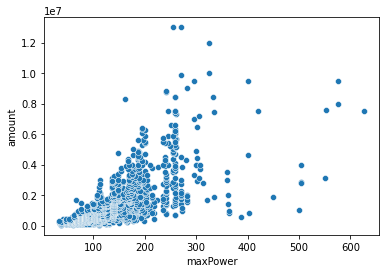

In [116]:
sns.scatterplot(x='maxPower',y='amount',data=df)

## Color

In [117]:
sum(df['Color'].isnull())

144

In [118]:
df['Color'].nunique()

116

there are 116 unique values and if we get dummies features will increase so just dropping it considering the computing power

In [119]:
df.drop('Color',inplace=True,axis=1)

In [120]:
df.columns

Index(['year', 'kms', 'owners', 'vehicle', 'manual', 'location', 'amount',
       'brand', 'mileage', 'engine', 'maxPower'],
      dtype='object')

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4514 entries, 1 to 4564
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      4514 non-null   int64  
 1   kms       4514 non-null   int64  
 2   owners    4514 non-null   int64  
 3   vehicle   4514 non-null   object 
 4   manual    4514 non-null   object 
 5   location  4514 non-null   object 
 6   amount    4514 non-null   int64  
 7   brand     4514 non-null   object 
 8   mileage   4514 non-null   float64
 9   engine    4514 non-null   float64
 10  maxPower  4514 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 423.2+ KB


In [122]:
df.head()

,year,kms,owners,vehicle,manual,location,amount,brand,mileage,engine,maxPower
1,2007,71000,1,Petrol,Manual,Hyderabad,80000,Maruti,16.1,796.0,37.0
2,2009,69000,2,Diesel,Manual,Hyderabad,98000,Ford,13.8,1399.0,68.0
3,2008,86000,1,Petrol,Manual,Hyderabad,99000,Maruti,16.1,796.0,37.0
4,2007,120000,1,Diesel,Manual,Hyderabad,100000,Tata,17.2,1396.0,53.5
5,2004,43664,1,Petrol,Manual,Hyderabad,100000,Ford,13.8,1299.0,70.0


In [123]:
df.describe()

,year,kms,owners,amount,mileage,engine,maxPower
count,4514.000000,4514.000000,4514.000000,4.514000e+03,4514.000000,4514.000000,4514.000000
mean,2014.334515,58857.192512,1.282233,9.239268e+05,18.447313,1593.564245,111.542168
std,3.478938,39237.538843,0.530989,1.062336e+06,4.072679,585.240874,51.506459
min,2000.000000,207.000000,1.000000,4.800000e+04,7.810000,624.000000,34.200000
25%,2012.000000,33000.000000,1.000000,3.900000e+05,15.630000,1197.000000,80.570000
50%,2015.000000,55000.000000,1.000000,6.000000e+05,18.490000,1461.000000,98.600000
75%,2017.000000,77000.000000,1.000000,9.800000e+05,21.010000,1968.000000,126.320000
max,2021.000000,821123.000000,4.000000,1.300000e+07,42.000000,5998.000000,626.000000


In [124]:
df['vehicle'].value_counts()

Petrol      2292
Diesel      2164
CNG           45
LPG           12
Electric       1
Name: vehicle, dtype: int64

<AxesSubplot:xlabel='vehicle', ylabel='amount'>

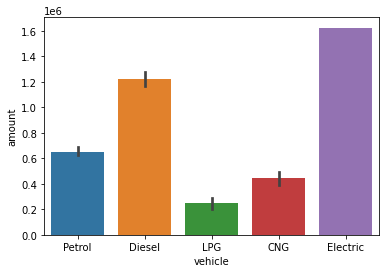

In [125]:
sns.barplot(x='vehicle',y='amount',data=df)

<AxesSubplot:xlabel='manual', ylabel='amount'>

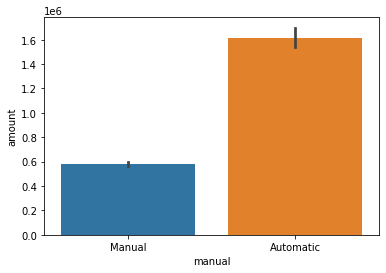

In [126]:
sns.barplot(x='manual',y='amount',data=df)

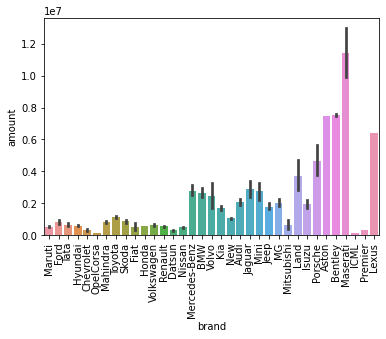

In [127]:
sns.barplot(x='brand',y='amount',data=df)
plt.xticks(rotation=90);

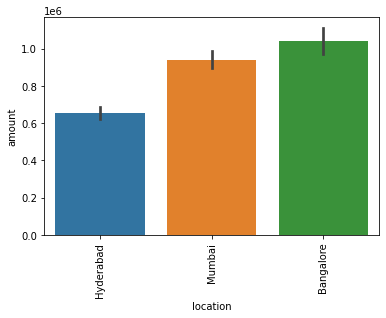

In [128]:
sns.barplot(x='location',y='amount',data=df)
plt.xticks(rotation=90);

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4514 entries, 1 to 4564
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      4514 non-null   int64  
 1   kms       4514 non-null   int64  
 2   owners    4514 non-null   int64  
 3   vehicle   4514 non-null   object 
 4   manual    4514 non-null   object 
 5   location  4514 non-null   object 
 6   amount    4514 non-null   int64  
 7   brand     4514 non-null   object 
 8   mileage   4514 non-null   float64
 9   engine    4514 non-null   float64
 10  maxPower  4514 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 552.2+ KB


In [130]:
numericCol=[]
for col in df.columns:
    #print(df[col].dtype)
    if "object"!=df[col].dtype:
        numericCol.append(col)

In [131]:
numericCol

['year', 'kms', 'owners', 'amount', 'mileage', 'engine', 'maxPower']

In [132]:
zScores=np.abs(zscore(df[numericCol]))
zScores

array([[2.10849615, 0.30950343, 0.53158269, ..., 0.57641979, 1.36294753,
        1.44739957],
       [1.53354438, 0.25852618, 1.35190575, ..., 1.14122119, 0.3324884 ,
        0.84546663],
       [1.82102026, 0.69183275, 0.53158269, ..., 0.57641979, 1.36294753,
        1.44739957],
       ...,
       [0.76626271, 0.72444251, 0.53158269, ..., 1.58323967, 2.38122487,
        3.09389323],
       [1.62869036, 1.16883663, 0.53158269, ..., 0.94318339, 2.27527385,
        4.16145043],
       [1.05373859, 0.69857156, 0.53158269, ..., 1.25663713, 2.3914782 ,
        2.78554823]])

In [2]:
filteredEntries=(zScores<3).all(axis=1)

NameError: name 'zScores' is not defined

In [3]:
np.sum(filteredEntries)

NameError: name 'np' is not defined

In [4]:
df.shape

NameError: name 'df' is not defined

In [5]:
((4514 - 4169)/4514)*100

7.642888790429773

7% of data is outliers so removing them

In [137]:
df=df[filteredEntries]

In [138]:
df.columns

Index(['year', 'kms', 'owners', 'vehicle', 'manual', 'location', 'amount',
       'brand', 'mileage', 'engine', 'maxPower'],
      dtype='object')

In [139]:
df1=df.copy()

In [140]:
df=pd.get_dummies(df,drop_first=True)

In [141]:
df.columns

Index(['year', 'kms', 'owners', 'amount', 'mileage', 'engine', 'maxPower',
       'vehicle_Diesel', 'vehicle_Electric', 'vehicle_LPG', 'vehicle_Petrol',
       'manual_Manual', 'location_Hyderabad', 'location_Mumbai', 'brand_BMW',
       'brand_Chevrolet', 'brand_Datsun', 'brand_Fiat', 'brand_Ford',
       'brand_Honda', 'brand_Hyundai', 'brand_ICML', 'brand_Isuzu',
       'brand_Jaguar', 'brand_Jeep', 'brand_Kia', 'brand_Land', 'brand_MG',
       'brand_Mahindra', 'brand_Maruti', 'brand_Mercedes-Benz', 'brand_Mini',
       'brand_Mitsubishi', 'brand_New', 'brand_Nissan', 'brand_OpelCorsa',
       'brand_Porsche', 'brand_Premier', 'brand_Renault', 'brand_Skoda',
       'brand_Tata', 'brand_Toyota', 'brand_Volkswagen', 'brand_Volvo'],
      dtype='object')

checking for correlation

<AxesSubplot:>

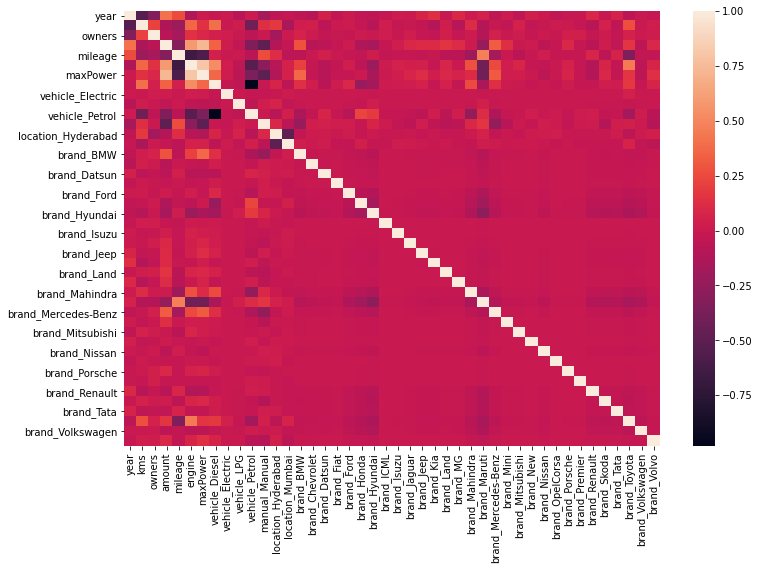

In [140]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr())

<AxesSubplot:>

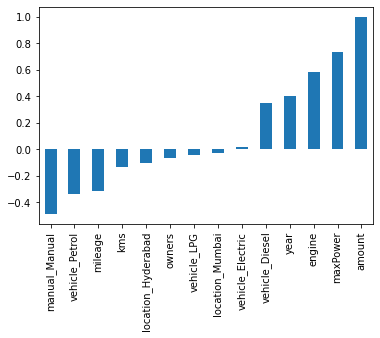

In [151]:
pd.get_dummies(df1.drop('brand',axis=1),drop_first=True).corr()['amount'].sort_values().plot(kind='bar')

<AxesSubplot:>

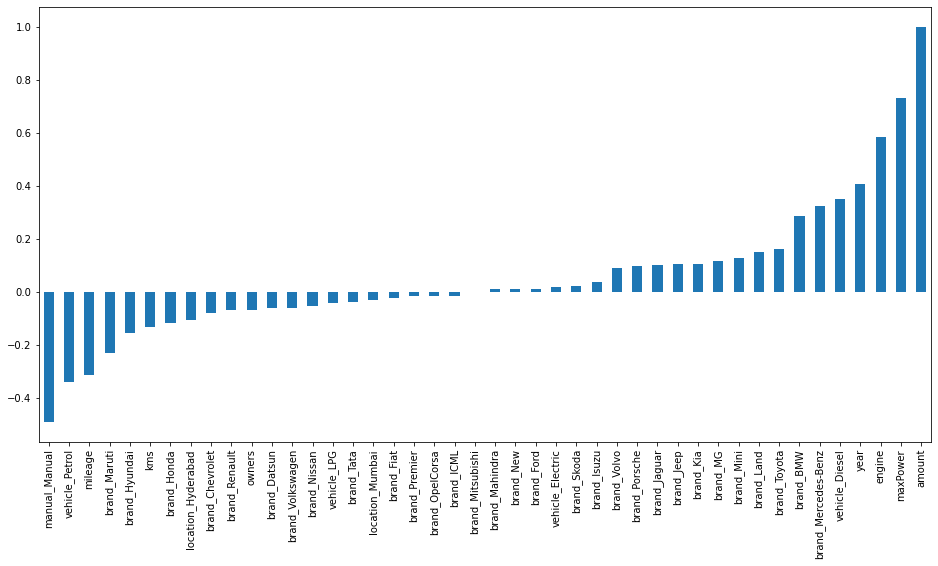

In [145]:
plt.figure(figsize=(16,8))
df.corr()['amount'].sort_values().plot(kind='bar')

In [142]:
X=df.drop('amount',axis=1)
y=df['amount']

<AxesSubplot:xlabel='amount', ylabel='Density'>

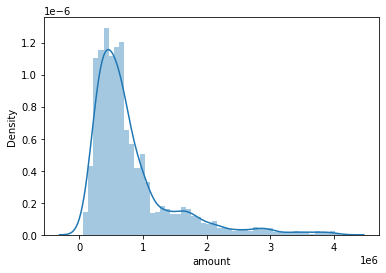

In [143]:
sns.distplot(df['amount'])

## identifying the best random state

In [141]:
minRMSE="null"
minRS=0
for i in range(200):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train,y_train)
    pred=lr.predict(X_test)
    RMSE=np.sqrt(mean_squared_error(y_test,pred))
    if(minRMSE=="null" or RMSE<minRMSE):
        minRMSE=RMSE
        minRS=i
        
print("min RMSE is",minRMSE,"on random state",minRS)

min RMSE is 262011.84463464678 on random state 104


min RMSE is 262011.84463464678 on random state 104

In [144]:
df['amount'].mean()

803275.5490525306

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=104)

In [146]:
def rmseValue(model,indepen,depend):
    y_pred=model.predict(indepen)
    return np.sqrt(mean_squared_error(y_pred,depend))

In [147]:
scaler = StandardScaler()

In [148]:
x_train_scale=scaler.fit_transform(X_train)
x_test_scale=scaler.transform(X_test)

In [149]:
lr=LinearRegression()
lr.fit(x_train_scale,y_train)
pred=lr.predict(x_test_scale)

lrR2=r2_score(y_test, pred)
print(lrR2)
lrRMSE=np.sqrt(mean_squared_error(y_test,pred))
lrRMSE

0.8180530852254186


262011.84463464838

In [150]:
svr=SVR()
svr.fit(x_train_scale,y_train)
pred=svr.predict(x_test_scale)
svrRMSE=np.sqrt(mean_squared_error(y_test,pred))
svrRMSE

640408.0490073697

In [151]:
svrR2=r2_score(y_test, pred)
svrR2

-0.08696712671944118

In [152]:
sgd=SGDRegressor()
sgd.fit(x_train_scale,y_train)
pred=sgd.predict(x_test_scale)
sgdRMSE=np.sqrt(mean_squared_error(y_test,pred))
sgdRMSE

5802566.253181661

In [153]:
sgdR2=r2_score(y_test, pred)
sgdR2

-88.23660971482043

In [154]:
knnR=KNeighborsRegressor()
knnR.fit(x_train_scale,y_train)
pred=knnR.predict(X_test)
knnrRMSE=np.sqrt(mean_squared_error(y_test,pred))
knnrRMSE

612940.6510808684

In [155]:
knnR2=r2_score(y_test, pred)
knnR2

0.0042743447468165385

In [156]:
rfrR=RandomForestRegressor()
rfrR.fit(x_train_scale,y_train)
pred=rfrR.predict(X_test)
rfrRRMSE=np.sqrt(mean_squared_error(y_test,pred))
rfrRRMSE

2323992.21889584

In [157]:
rfrR2=r2_score(y_test, pred)
rfrR2

-13.314368250450903

Linear Regression is the best method, as it has the least RMSE(262011.84463464838) and also the r2 score(0.8180530852254186) is good

In [158]:
df.describe()

,year,kms,owners,amount,mileage,engine,maxPower,vehicle_Diesel,vehicle_Electric,vehicle_LPG,vehicle_Petrol,manual_Manual,location_Hyderabad,location_Mumbai,brand_BMW,brand_Chevrolet,brand_Datsun,brand_Fiat,brand_Ford,brand_Honda,brand_Hyundai,brand_ICML,brand_Isuzu,brand_Jaguar,brand_Jeep,brand_Kia,brand_Land,brand_MG,brand_Mahindra,brand_Maruti,brand_Mercedes-Benz,brand_Mini,brand_Mitsubishi,brand_New,brand_Nissan,brand_OpelCorsa,brand_Porsche,brand_Premier,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo
count,4169.000000,4169.000000,4169.000000,4.169000e+03,4169.000000,4169.000000,4169.000000,4169.000000,4169.000000,4169.000000,4169.000000,4169.000000,4169.000000,4169.000000,4169.000000,4169.000000,4169.000000,4169.000000,4169.000000,4169.000000,4169.000000,4169.000000,4169.00000,4169.000000,4169.000000,4169.000000,4169.000000,4169.000000,4169.000000,4169.000000,4169.000000,4169.000000,4169.000000,4169.000000,4169.000000,4169.000000,4169.00000,4169.00000,4169.000000,4169.000000,4169.000000,4169.000000,4169.000000,4169.000000
mean,2014.486208,56399.272967,1.218278,8.032755e+05,18.653646,1539.135764,106.003392,0.469897,0.000240,0.002399,0.520269,0.686975,0.168386,0.545934,0.022787,0.010554,0.006237,0.002878,0.046054,0.100744,0.188774,0.000240,0.00048,0.001679,0.005997,0.006237,0.003118,0.003838,0.059727,0.242504,0.033101,0.002639,0.002639,0.000720,0.011514,0.000240,0.00048,0.00048,0.030703,0.034781,0.030703,0.073639,0.046774,0.004797
std,3.347280,31126.542001,0.413127,6.527047e+05,3.889840,504.290031,39.206362,0.499153,0.015488,0.048923,0.499649,0.463780,0.374253,0.497945,0.149242,0.102202,0.078734,0.053580,0.209628,0.301025,0.391376,0.015488,0.02190,0.040947,0.077215,0.078734,0.055761,0.061839,0.237008,0.428649,0.178923,0.051305,0.051305,0.026819,0.106695,0.015488,0.02190,0.02190,0.172532,0.183245,0.172532,0.261213,0.211179,0.069105
min,2004.000000,207.000000,1.000000,5.500000e+04,9.000000,624.000000,34.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,33000.000000,1.000000,3.950000e+05,16.000000,1197.000000,80.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2015.000000,54000.000000,1.000000,5.990000e+05,18.600000,1399.000000,91.100000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2017.000000,75000.000000,1.000000,9.449990e+05,21.100000,1798.000000,121.300000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2021.000000,176000.000000,2.000000,4.100000e+06,28.400000,3198.000000,261.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [159]:
df['amount'].mean()

803275.5490525306

Mean amount in y Test is 781270.2936046511 and rmse is 262011.84463464838 with linear regresssion 

In [160]:
y_test.mean()

781270.2936046511

## Hyper Parameter Tuning

In [161]:
elastic_model = ElasticNetCV()
#l1_ratio=[.1, .5, .7,.9, .95, .99, 1],tol=0.01,eps=0.1,n_alphas=100,cv=5)

In [162]:
operations = [('scaler',StandardScaler()),('el',elastic_model)]

In [163]:
param_grid = {'el__l1_ratio':[.1, .5, .7,.9, .95, .99, 1],'el__tol':[0.01],'el__eps':[0.1],'el__n_alphas':[100]}

In [164]:
from sklearn.pipeline import Pipeline

In [165]:
pipe = Pipeline(operations)

In [166]:
grid = GridSearchCV(pipe,param_grid)
grid.fit(X, y)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('el', ElasticNetCV())]),
             param_grid={'el__eps': [0.1],
                         'el__l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1],
                         'el__n_alphas': [100], 'el__tol': [0.01]})

In [167]:
grid.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('el', ElasticNetCV(eps=0.1, l1_ratio=1, tol=0.01))])

In [168]:
grid.best_params_

{'el__eps': 0.1, 'el__l1_ratio': 1, 'el__n_alphas': 100, 'el__tol': 0.01}

In [169]:
pd.DataFrame(data=grid.cv_results_,columns=grid.cv_results_.keys())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_el__eps,param_el__l1_ratio,param_el__n_alphas,param_el__tol,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.243005,0.032722,0.011469,0.006652,0.1,0.1,100,0.01,"{'el__eps': 0.1, 'el__l1_ratio': 0.1, 'el__n_a...",-0.485499,-45.926333,-0.654133,-0.289602,-0.364105,-9.543934,18.191617,7
1,0.264928,0.012343,0.006601,0.005970,0.1,0.5,100,0.01,"{'el__eps': 0.1, 'el__l1_ratio': 0.5, 'el__n_a...",-0.485383,-45.923826,-0.654055,-0.289524,-0.364036,-9.543365,18.190648,6
2,0.248963,0.035182,0.010109,0.005693,0.1,0.7,100,0.01,"{'el__eps': 0.1, 'el__l1_ratio': 0.7, 'el__n_a...",-0.485209,-45.920065,-0.653938,-0.289407,-0.363933,-9.542511,18.189195,5
3,0.242163,0.037859,0.010195,0.006286,0.1,0.9,100,0.01,"{'el__eps': 0.1, 'el__l1_ratio': 0.9, 'el__n_a...",-0.484340,-45.901274,-0.653355,-0.288824,-0.363419,-9.538242,18.181934,4
4,0.258706,0.028290,0.003160,0.003946,0.1,0.95,100,0.01,"{'el__eps': 0.1, 'el__l1_ratio': 0.95, 'el__n_...",-0.483037,-45.873126,-0.652485,-0.287949,-0.362649,-9.531849,18.171056,3
5,0.254690,0.031095,0.005305,0.004364,0.1,0.99,100,0.01,"{'el__eps': 0.1, 'el__l1_ratio': 0.99, 'el__n_...",-0.472701,-45.649601,-0.645688,-0.281024,-0.356544,-9.481112,18.084663,2
6,0.259769,0.028470,0.006998,0.005138,0.1,1,100,0.01,"{'el__eps': 0.1, 'el__l1_ratio': 1, 'el__n_alp...",0.660344,-8.306709,-2.571829,0.623267,0.559140,-1.807157,3.476314,1


## Training with best params

In [170]:
grid.best_params_

{'el__eps': 0.1, 'el__l1_ratio': 1, 'el__n_alphas': 100, 'el__tol': 0.01}

In [171]:
operations = [('scaler',StandardScaler()),('el',ElasticNetCV(eps= 0.1, l1_ratio= 1, n_alphas= 100, tol= 0.01))]

pipe = Pipeline(operations)

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=104)

In [173]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('el', ElasticNetCV(eps=0.1, l1_ratio=1, tol=0.01))])

In [174]:
np.sqrt(mean_squared_error(y_test,pipe.predict(X_test)))

309564.37037387845

Final Rmse on test set is 309564 

In [175]:
y_test.mean()

781270.2936046511

In [176]:
finalModelR2Score=r2_score(y_test, pipe.predict(X_test))
finalModelR2Score

0.7460169202673487

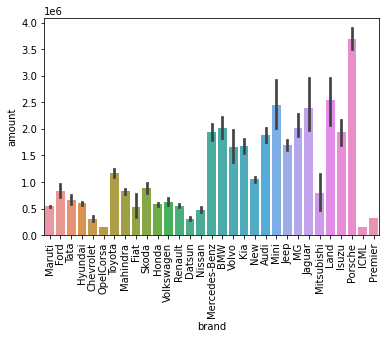

In [178]:
sns.barplot(x='brand',y='amount',data=df1)
plt.xticks(rotation=90);

We can achieve less error if we train the model with price range between 0 to 20 lakhs as we have more data there.
or we can train different models for different brand cars.
as some brand cars have more price than others

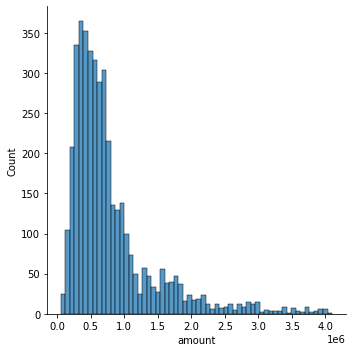

In [179]:
sns.displot(df['amount'])

## saving the model


In [180]:
import joblib
joblib.dump(pipe,"usedCarsPricePrediction.pkl")

['usedCarsPricePrediction.pkl']